<a href="https://colab.research.google.com/github/TaniaR078/Final_Project_MSIB/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from time import time
from datetime import datetime
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sa
import statsmodels.formula.api as sm
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1. Eksplorasi Data awal

In [ ]:
# masukkan data dari file yang disiapkan ke sebuah dataframe
# disini saya menggunakan format csv
data = pd.read_excel('Final Project 6C.xlsx', sheet_name='Project 5 - Dataset')

In [ ]:
# cek data customer dengan mencoba menampilkan 10 baris pertama
data.head(10)

,Tanggal Input,Nama Murid,Jenjang,Nama Ayah/Ibu,Lokasi Belajar,"Nama Guru, Wali Kelas",Dekat/Tidak Jarak Sekolah,Kemudahan Mencari Lokasi,Kondisi Lingkungan Belajar,Kelengkapan Bahan Ajar,...,Kemampuan Interaksi Guru,Komunikasi Orang Tua Dan Tim Sekolah,Komunikasi Dengan Guru Kelas\n,Kecakapan Tim Admin Merespon,Kejelasan Materi Dari Guru,Sering/Tidak Mengakses Program Belajar,Kemudahan Informasi Tentang Pembelajaran Anak,Fasilitas Harapan\n,Kepuasan Keseluruhan,Unnamed: 21
0,2022-09-15 12:49:45.178000,Mah***********************,KB,Cut********,Lokasi Belajar 15,Herlina,3,3,2,4,...,3,4,3,4,3,4,3,outdoor playground,3.230769,42.0
1,2022-09-15 12:49:45.178000,Mah***********************,KB,Cut********,Lokasi Belajar 15,Martina Dwi Fitrianti,3,3,2,4,...,3,4,3,4,3,4,3,outdoor playground,3.230769,NaN
2,2022-09-15 13:59:36.972000,Pri************,KB,Moh***********,Lokasi Belajar 22,Roro,4,5,4,4,...,5,5,5,5,5,3,4,ekskul tambahan seperti musik nari atau olah raga,4.538462,NaN
3,2022-09-15 19:10:54.693000,Alu****************,PAUD B,Pan**************,Lokasi Belajar 3,Tysa,4,4,4,3,...,5,5,5,5,4,4,4,papan untuk memajang hasil kreasi anak,4.307692,NaN
4,2022-09-15 19:25:51.080000,Azk******************,PAUD A,Nur************,Lokasi Belajar 21,Dita Debita,3,5,5,5,...,5,5,5,5,5,4,5,sudah cukup baik,4.769231,NaN
5,2022-09-15 19:33:49.685000,Ray*******,PAUD A,Ran*,Lokasi Belajar 20,Layla,2,5,4,4,...,4,3,3,4,4,5,4,"parkir, safety gate supaya anak tdk naik turun...",4.000000,NaN
6,2022-09-15 21:36:26.034000,Joa*****************,PAUD A,Dia*********,Lokasi Belajar 15,Martina Dwi Fitrianti,5,4,4,4,...,4,3,3,4,4,4,3,sudah cukup baik,3.846154,NaN
7,2022-09-15 21:51:35.542000,Alm****************,PAUD B,Zah*************,Lokasi Belajar 15,Tasya,5,5,4,4,...,4,3,3,3,4,4,3,playground dan ruang tunggu untuk orang tua.,3.846154,NaN
8,2022-09-15 22:16:22.380000,Qai***********************,PAUD A,Van*************,Lokasi Belajar 1,Anissa Aminni,4,5,4,4,...,4,4,4,4,4,5,5,sudah cukup baik,4.230769,NaN
9,2022-09-16 02:28:25.016000,Raf*********************,PAUD A,Rar**********,Lokasi Belajar 15,Rachmah Tiara Bahtiar,3,4,4,3,...,5,4,4,3,5,4,4,"lapangan, mini auditorium, playkit tambahan di...",3.923077,NaN


In [ ]:
# cek juga jumlah baris data untuk mengetahui seberapa banyak data yang ada
data.shape[0]

344

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Tanggal Input                                  344 non-null    object 
 1   Nama Murid                                     344 non-null    object 
 2   Jenjang                                        344 non-null    object 
 3   Nama Ayah/Ibu                                  344 non-null    object 
 4   Lokasi Belajar                                 344 non-null    object 
 5   Nama Guru, Wali Kelas                          344 non-null    object 
 6   Dekat/Tidak Jarak Sekolah                      344 non-null    int64  
 7   Kemudahan Mencari Lokasi                       344 non-null    int64  
 8   Kondisi Lingkungan Belajar                     344 non-null    int64  
 9   Kelengkapan Bahan Ajar                         344 non

In [ ]:
# cek terlebih dahulu data laptop
data.head(3)

,Tanggal Input,Nama Murid,Jenjang,Nama Ayah/Ibu,Lokasi Belajar,"Nama Guru, Wali Kelas",Dekat/Tidak Jarak Sekolah,Kemudahan Mencari Lokasi,Kondisi Lingkungan Belajar,Kelengkapan Bahan Ajar,...,Kemampuan Interaksi Guru,Komunikasi Orang Tua Dan Tim Sekolah,Komunikasi Dengan Guru Kelas\n,Kecakapan Tim Admin Merespon,Kejelasan Materi Dari Guru,Sering/Tidak Mengakses Program Belajar,Kemudahan Informasi Tentang Pembelajaran Anak,Fasilitas Harapan\n,Kepuasan Keseluruhan,Unnamed: 21
0,2022-09-15 12:49:45.178000,Mah***********************,KB,Cut********,Lokasi Belajar 15,Herlina,3,3,2,4,...,3,4,3,4,3,4,3,outdoor playground,3.230769,42.0
1,2022-09-15 12:49:45.178000,Mah***********************,KB,Cut********,Lokasi Belajar 15,Martina Dwi Fitrianti,3,3,2,4,...,3,4,3,4,3,4,3,outdoor playground,3.230769,NaN
2,2022-09-15 13:59:36.972000,Pri************,KB,Moh***********,Lokasi Belajar 22,Roro,4,5,4,4,...,5,5,5,5,5,3,4,ekskul tambahan seperti musik nari atau olah raga,4.538462,NaN


In [ ]:
data1 = data.columns.str.replace(' ', '_')
data1

Index(['Tanggal_Input', 'Nama_Murid', 'Jenjang', 'Nama_Ayah/Ibu',
       'Lokasi_Belajar', 'Nama_Guru,_Wali_Kelas', 'Dekat/Tidak_Jarak_Sekolah',
       'Kemudahan_Mencari_Lokasi', 'Kondisi_Lingkungan_Belajar',
       'Kelengkapan_Bahan_Ajar', 'Kebersihan_Ruangan',
       'Penerapan_Protokol_Kesehatan', 'Kemampuan_Interaksi_Guru',
       'Komunikasi_Orang_Tua_Dan_Tim_Sekolah',
       'Komunikasi_Dengan_Guru_Kelas\n', 'Kecakapan_Tim_Admin_Merespon',
       'Kejelasan_Materi_Dari_Guru', 'Sering/Tidak_Mengakses_Program_Belajar',
       'Kemudahan_Informasi_Tentang_Pembelajaran_Anak', 'Fasilitas_Harapan\n',
       'Kepuasan_Keseluruhan', 'Unnamed:_21'],
      dtype='object')

In [ ]:
df = pd.DataFrame(data)

# Mengganti spasi dengan garis bawah pada nama kolom
df.columns = df.columns.str.replace(' ', '_')

# Menampilkan DataFrame setelah perubahan
df

,Tanggal_Input,Nama_Murid,Jenjang,Nama_Ayah/Ibu,Lokasi_Belajar,"Nama_Guru,_Wali_Kelas",Dekat/Tidak_Jarak_Sekolah,Kemudahan_Mencari_Lokasi,Kondisi_Lingkungan_Belajar,Kelengkapan_Bahan_Ajar,...,Kemampuan_Interaksi_Guru,Komunikasi_Orang_Tua_Dan_Tim_Sekolah,Komunikasi_Dengan_Guru_Kelas\n,Kecakapan_Tim_Admin_Merespon,Kejelasan_Materi_Dari_Guru,Sering/Tidak_Mengakses_Program_Belajar,Kemudahan_Informasi_Tentang_Pembelajaran_Anak,Fasilitas_Harapan\n,Kepuasan_Keseluruhan,Unnamed:_21
0,2022-09-15 12:49:45.178000,Mah***********************,KB,Cut********,Lokasi Belajar 15,Herlina,3,3,2,4,...,3,4,3,4,3,4,3,outdoor playground,3.230769,42.0
1,2022-09-15 12:49:45.178000,Mah***********************,KB,Cut********,Lokasi Belajar 15,Martina Dwi Fitrianti,3,3,2,4,...,3,4,3,4,3,4,3,outdoor playground,3.230769,NaN
2,2022-09-15 13:59:36.972000,Pri************,KB,Moh***********,Lokasi Belajar 22,Roro,4,5,4,4,...,5,5,5,5,5,3,4,ekskul tambahan seperti musik nari atau olah raga,4.538462,NaN
3,2022-09-15 19:10:54.693000,Alu****************,PAUD B,Pan**************,Lokasi Belajar 3,Tysa,4,4,4,3,...,5,5,5,5,4,4,4,papan untuk memajang hasil kreasi anak,4.307692,NaN
4,2022-09-15 19:25:51.080000,Azk******************,PAUD A,Nur************,Lokasi Belajar 21,Dita Debita,3,5,5,5,...,5,5,5,5,5,4,5,sudah cukup baik,4.769231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,9/20/2022 19:57:52,Ban***********,KB,Pra*****************,Lokasi Belajar 23,Nadya,5,5,5,5,...,4,4,4,3,4,3,4,sudah cukup baik,4.307692,NaN
340,9/20/2022 19:57:52,Ban***********,KB,Pra*****************,Lokasi Belajar 23,Roro,5,5,5,5,...,4,4,4,3,4,3,4,sudah cukup baik,4.307692,NaN
341,9/18/2022 22:22:40,Ald*************************,PAUD A,Fer**************,Lokasi Belajar 21,Dita Debita,5,5,5,4,...,5,4,4,4,5,5,5,"untuk menambah guru kembali, jd dalam setiap k...",4.615385,NaN
342,9/20/2022 16:23:53,I G********************************,PAUD B,Yul************,Lokasi Belajar 21,Dita Debita,4,4,4,4,...,4,4,4,4,4,4,4,lebih lengkap fasilitas kalau bisa perpustakaa...,3.923077,NaN


In [ ]:
# hapus
data_s = df.drop(['Tanggal_Input', 'Nama_Murid', 'Nama_Ayah/Ibu', 'Fasilitas_Harapan\n', 'Unnamed:_21'], axis=1)
data_s.head(3)

,Jenjang,Lokasi_Belajar,"Nama_Guru,_Wali_Kelas",Dekat/Tidak_Jarak_Sekolah,Kemudahan_Mencari_Lokasi,Kondisi_Lingkungan_Belajar,Kelengkapan_Bahan_Ajar,Kebersihan_Ruangan,Penerapan_Protokol_Kesehatan,Kemampuan_Interaksi_Guru,Komunikasi_Orang_Tua_Dan_Tim_Sekolah,Komunikasi_Dengan_Guru_Kelas\n,Kecakapan_Tim_Admin_Merespon,Kejelasan_Materi_Dari_Guru,Sering/Tidak_Mengakses_Program_Belajar,Kemudahan_Informasi_Tentang_Pembelajaran_Anak,Kepuasan_Keseluruhan
0,KB,Lokasi Belajar 15,Herlina,3,3,2,4,3,3,3,4,3,4,3,4,3,3.230769
1,KB,Lokasi Belajar 15,Martina Dwi Fitrianti,3,3,2,4,3,3,3,4,3,4,3,4,3,3.230769
2,KB,Lokasi Belajar 22,Roro,4,5,4,4,5,5,5,5,5,5,5,3,4,4.538462


karena data laptop ini memiliki tipe data kategorikal dan numerik, maka dilakukan proses one hot encoder terlebih dahulu agar semua nilai menjadi numerik, dan proses regresi linear dapat dilakukan

In [ ]:
# lakukan proses encoder dengan menggunakan One Hot Encoder untuk mengubah semua nilai menjadi nilai numerik, sehingga proses regresi linear dapat dilakukan
encoder = OneHotEncoder()
encoder.fit(data_s.select_dtypes(include="object"))
survey_onehot = pd.DataFrame(encoder.transform(data_s.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

survey_preprocessed = pd.concat([data_s.select_dtypes(exclude="object"), survey_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(survey_preprocessed)
survey_scaled = pd.DataFrame(scaler.transform(survey_preprocessed),columns=survey_preprocessed.columns)
# Ganti spasi dengan karakter garis bawah (_) dalam nama kolom
survey_scaled.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
survey_scaled.rename(columns=lambda x: x.replace('Nama_Guru,_Wali_Kelas', 'nama_guru_wali'), inplace=True)

survey_scaled.head()

,Dekat/Tidak_Jarak_Sekolah,Kemudahan_Mencari_Lokasi,Kondisi_Lingkungan_Belajar,Kelengkapan_Bahan_Ajar,Kebersihan_Ruangan,Penerapan_Protokol_Kesehatan,Kemampuan_Interaksi_Guru,Komunikasi_Orang_Tua_Dan_Tim_Sekolah,Komunikasi_Dengan_Guru_Kelas\n,Kecakapan_Tim_Admin_Merespon,...,nama_guru_wali_Tami,nama_guru_wali_Tasya,nama_guru_wali_Tya,nama_guru_wali_Tysa,nama_guru_wali_Tysa_,nama_guru_wali_Wangi_Ulandari,nama_guru_wali_Wemni_Cristian,nama_guru_wali_Yara,nama_guru_wali_Yovita_Elvinasari_Suharto,nama_guru_wali_Zahra
0,-0.708971,-1.781029,-2.233797,-0.112633,-1.578978,-1.441055,-1.832158,-0.049538,-1.393871,0.134976,...,-0.121447,-0.144123,-0.121447,-0.144123,-0.053995,-0.173032,-0.228008,-0.076472,-0.108465,-0.093796
1,-0.708971,-1.781029,-2.233797,-0.112633,-1.578978,-1.441055,-1.832158,-0.049538,-1.393871,0.134976,...,-0.121447,-0.144123,-0.121447,-0.144123,-0.053995,-0.173032,-0.228008,-0.076472,-0.108465,-0.093796
2,0.174674,0.719681,-0.035153,-0.112633,1.083612,1.025228,0.844115,1.015524,0.911377,1.166791,...,-0.121447,-0.144123,-0.121447,-0.144123,-0.053995,-0.173032,-0.228008,-0.076472,-0.108465,-0.093796
3,0.174674,-0.530674,-0.035153,-1.362502,-0.247683,1.025228,0.844115,1.015524,0.911377,1.166791,...,-0.121447,-0.144123,-0.121447,-0.144123,18.520259,-0.173032,-0.228008,-0.076472,-0.108465,-0.093796
4,-0.708971,0.719681,1.064169,1.137235,1.083612,1.025228,0.844115,1.015524,0.911377,1.166791,...,-0.121447,-0.144123,-0.121447,-0.144123,-0.053995,-0.173032,-0.228008,-0.076472,-0.108465,-0.093796


In [ ]:
survey_scaled.rename(columns={'Sering/Tidak_Mengakses_Program_Belajar': 'sering_akses_program_belajar', 'Dekat/Tidak_Jarak_Sekolah': 'jarak_sekolah', 'Komunikasi_Dengan_Guru_Kelas\n':'Komunikasi_Dengan_Guru_Kelas'}, inplace=True)

In [ ]:
# menentukan indikator yang mementukan kepuasan
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
data_s_regresi = survey_scaled.corr()['Kepuasan_Keseluruhan'].sort_values()
print(data_s_regresi)

Jenjang_SD_2                                    -0.183743
nama_guru_wali_Martina_Dwi_Fitrianti            -0.173847
nama_guru_wali_Ifadah                           -0.170651
nama_guru_wali_Hani                             -0.160905
nama_guru_wali_Herlina                          -0.157438
Lokasi_Belajar_Lokasi_Belajar_15                -0.126648
nama_guru_wali_Tya                              -0.121916
nama_guru_wali_Komang_Sri_Apriliani             -0.114513
Jenjang_SD_4                                    -0.109343
Lokasi_Belajar_Lokasi_Belajar_2                 -0.108296
Lokasi_Belajar_Lokasi_Belajar_8                 -0.090794
Lokasi_Belajar_Lokasi_Belajar_18                -0.088196
Jenjang_SMA_10                                  -0.085522
nama_guru_wali_Martha                           -0.079678
Jenjang_SD_1                                    -0.078959
nama_guru_wali_Helvira                          -0.078494
nama_guru_wali_Dwi                              -0.063029
nama_guru_wali

#### Ordinary Least Square (OLS)

selanjutnya menggunakan Ordinary Least Square (OLS) untuk mendapatkan model regresi linear

saya menggunakan index data dengan nilai korelasi yang < -0.15 dan > 0.15, sehingga untuk nilai diantara -0.15 dan 0.15 tidak dipakai, karena asumsi saya index data tersebut tidak terlalu kuat berkorelasi dengan index kepuasan

In [ ]:
model_1 = sm.ols(formula='Kepuasan_Keseluruhan ~ Jenjang_SD_2 + nama_guru_wali_Martina_Dwi_Fitrianti + nama_guru_wali_Ifadah + nama_guru_wali_Hani + nama_guru_wali_Herlina + nama_guru_wali_Rini_Maryani + sering_akses_program_belajar  + jarak_sekolah + Kemudahan_Mencari_Lokasi + Kelengkapan_Bahan_Ajar + Kecakapan_Tim_Admin_Merespon + Kemampuan_Interaksi_Guru + Penerapan_Protokol_Kesehatan + Kemudahan_Informasi_Tentang_Pembelajaran_Anak + Kondisi_Lingkungan_Belajar + Kebersihan_Ruangan + Komunikasi_Orang_Tua_Dan_Tim_Sekolah + Komunikasi_Dengan_Guru_Kelas + Kejelasan_Materi_Dari_Guru', data=survey_scaled).fit()
print(model_1.summary())

                             OLS Regression Results                             
Dep. Variable:     Kepuasan_Keseluruhan   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 3.606e+31
Date:                  Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                          02:28:27   Log-Likelihood:                 11522.
No. Observations:                   344   AIC:                        -2.300e+04
Df Residuals:                       324   BIC:                        -2.293e+04
Df Model:                            19                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
model_2 = sm.ols(formula='Kepuasan_Keseluruhan ~ Jenjang_SD_2 + nama_guru_wali_Martina_Dwi_Fitrianti + nama_guru_wali_Ifadah + nama_guru_wali_Hani + nama_guru_wali_Herlina + sering_akses_program_belajar  + jarak_sekolah + Kemudahan_Mencari_Lokasi + Kelengkapan_Bahan_Ajar + Kecakapan_Tim_Admin_Merespon + Kemampuan_Interaksi_Guru + Penerapan_Protokol_Kesehatan + Kemudahan_Informasi_Tentang_Pembelajaran_Anak + Kondisi_Lingkungan_Belajar + Kebersihan_Ruangan + Komunikasi_Orang_Tua_Dan_Tim_Sekolah + Komunikasi_Dengan_Guru_Kelas + Kejelasan_Materi_Dari_Guru', data=survey_scaled).fit()
print(model_2.summary())

                             OLS Regression Results                             
Dep. Variable:     Kepuasan_Keseluruhan   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 7.189e+30
Date:                  Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                          02:28:27   Log-Likelihood:                 11235.
No. Observations:                   344   AIC:                        -2.243e+04
Df Residuals:                       325   BIC:                        -2.236e+04
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
model_3 = sm.ols(formula='Kepuasan_Keseluruhan ~  nama_guru_wali_Martina_Dwi_Fitrianti + nama_guru_wali_Ifadah + nama_guru_wali_Hani + nama_guru_wali_Herlina + sering_akses_program_belajar  + jarak_sekolah + Kemudahan_Mencari_Lokasi + Kelengkapan_Bahan_Ajar + Kecakapan_Tim_Admin_Merespon + Kemampuan_Interaksi_Guru + Penerapan_Protokol_Kesehatan + Kemudahan_Informasi_Tentang_Pembelajaran_Anak + Kondisi_Lingkungan_Belajar + Kebersihan_Ruangan + Komunikasi_Orang_Tua_Dan_Tim_Sekolah + Komunikasi_Dengan_Guru_Kelas + Kejelasan_Materi_Dari_Guru', data=survey_scaled).fit()
print(model_3.summary())

                             OLS Regression Results                             
Dep. Variable:     Kepuasan_Keseluruhan   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 3.375e+31
Date:                  Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                          02:28:27   Log-Likelihood:                 11490.
No. Observations:                   344   AIC:                        -2.294e+04
Df Residuals:                       326   BIC:                        -2.288e+04
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
model_4 = sm.ols(formula='Kepuasan_Keseluruhan ~  nama_guru_wali_Martina_Dwi_Fitrianti + nama_guru_wali_Ifadah + nama_guru_wali_Herlina + sering_akses_program_belajar  + jarak_sekolah + Kemudahan_Mencari_Lokasi + Kelengkapan_Bahan_Ajar + Kecakapan_Tim_Admin_Merespon + Kemampuan_Interaksi_Guru + Penerapan_Protokol_Kesehatan + Kemudahan_Informasi_Tentang_Pembelajaran_Anak + Kondisi_Lingkungan_Belajar + Kebersihan_Ruangan + Komunikasi_Orang_Tua_Dan_Tim_Sekolah + Komunikasi_Dengan_Guru_Kelas + Kejelasan_Materi_Dari_Guru', data=survey_scaled).fit()
print(model_4.summary())

                             OLS Regression Results                             
Dep. Variable:     Kepuasan_Keseluruhan   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 1.163e+31
Date:                  Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                          02:28:27   Log-Likelihood:                 11296.
No. Observations:                   344   AIC:                        -2.256e+04
Df Residuals:                       327   BIC:                        -2.249e+04
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
model_4 = sm.ols(formula='Kepuasan_Keseluruhan ~  nama_guru_wali_Martina_Dwi_Fitrianti + nama_guru_wali_Ifadah + sering_akses_program_belajar  + jarak_sekolah + Kemudahan_Mencari_Lokasi + Kelengkapan_Bahan_Ajar + Kecakapan_Tim_Admin_Merespon + Kemampuan_Interaksi_Guru + Penerapan_Protokol_Kesehatan + Kemudahan_Informasi_Tentang_Pembelajaran_Anak + Kondisi_Lingkungan_Belajar + Kebersihan_Ruangan + Komunikasi_Orang_Tua_Dan_Tim_Sekolah + Komunikasi_Dengan_Guru_Kelas + Kejelasan_Materi_Dari_Guru', data=survey_scaled).fit()
print(model_4.summary())

                             OLS Regression Results                             
Dep. Variable:     Kepuasan_Keseluruhan   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 5.054e+31
Date:                  Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                          02:28:27   Log-Likelihood:                 11537.
No. Observations:                   344   AIC:                        -2.304e+04
Df Residuals:                       328   BIC:                        -2.298e+04
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
model_5 = sm.ols(formula='Kepuasan_Keseluruhan ~  nama_guru_wali_Martina_Dwi_Fitrianti + sering_akses_program_belajar  + jarak_sekolah + Kemudahan_Mencari_Lokasi + Kelengkapan_Bahan_Ajar + Kecakapan_Tim_Admin_Merespon + Kemampuan_Interaksi_Guru + Penerapan_Protokol_Kesehatan + Kemudahan_Informasi_Tentang_Pembelajaran_Anak + Kondisi_Lingkungan_Belajar + Kebersihan_Ruangan + Komunikasi_Orang_Tua_Dan_Tim_Sekolah + Komunikasi_Dengan_Guru_Kelas + Kejelasan_Materi_Dari_Guru', data=survey_scaled).fit()
print(model_5.summary())

                             OLS Regression Results                             
Dep. Variable:     Kepuasan_Keseluruhan   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 1.630e+31
Date:                  Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                          02:28:27   Log-Likelihood:                 11330.
No. Observations:                   344   AIC:                        -2.263e+04
Df Residuals:                       329   BIC:                        -2.257e+04
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

karena p value sudah tidak ada yang lebih dari 0.05, maka proses modeling selesai, dan hasil terakhir merupakan hasil akhir dari proses regresi linear

In [ ]:
# Mengakses parameter (koefisien) model
coef = model_5.params

# Mendapatkan nama indeks (nama variabel) dari koefisien dengan nilai tertinggi
nama_indeks_tertinggi = coef.drop('Intercept').abs().idxmax()
nama_indeks_terendah = coef.drop('Intercept').abs().idxmin()

# Mendapatkan nilai tertinggi dari koefisien
nilai_tertinggi = coef[nama_indeks_tertinggi]
nilai_terendah = coef[nama_indeks_terendah]

# Menampilkan nama indeks dan nilai tertinggi dari koefisien
print("--INSIGHT--")
print("Variabel yang paling berpengaruh terhadap Kepuasan_Keseluruhan:", nama_indeks_tertinggi)
print("Nilai tertinggi dari koefisien:", "{:.16f}".format(nilai_tertinggi))
print("Variabel yang paling kurang berpengaruh terhadap Kepuasan_Keseluruhan:", nama_indeks_terendah)
print("Nilai terendah dari koefisien:", "{:.16f}".format(nilai_terendah))

# Mencetak persamaan model regresi linear
print("Persamaan model regresi linear:")
for i, c in enumerate(coef.index):
    if i == 0:
        intercept_value = coef['Intercept']
        print(f"{intercept_value:.16f} ", end=" ")
    else:
        print(f"+ {coef[c]:.2f} * {c} ", end=" ")

--INSIGHT--
Variabel yang paling berpengaruh terhadap Kepuasan_Keseluruhan: jarak_sekolah
Nilai tertinggi dari koefisien: 0.1541497896855843
Variabel yang paling kurang berpengaruh terhadap Kepuasan_Keseluruhan: nama_guru_wali_Martina_Dwi_Fitrianti
Nilai terendah dari koefisien: 0.0000000000000002
Persamaan model regresi linear:
0.0000000000000004  + 0.00 * nama_guru_wali_Martina_Dwi_Fitrianti  + 0.11 * sering_akses_program_belajar  + 0.15 * jarak_sekolah  + 0.11 * Kemudahan_Mencari_Lokasi  + 0.11 * Kelengkapan_Bahan_Ajar  + 0.13 * Kecakapan_Tim_Admin_Merespon  + 0.10 * Kemampuan_Interaksi_Guru  + 0.11 * Penerapan_Protokol_Kesehatan  + 0.11 * Kemudahan_Informasi_Tentang_Pembelajaran_Anak  + 0.12 * Kondisi_Lingkungan_Belajar  + 0.10 * Kebersihan_Ruangan  + 0.13 * Komunikasi_Orang_Tua_Dan_Tim_Sekolah  + 0.12 * Komunikasi_Dengan_Guru_Kelas  + 0.10 * Kejelasan_Materi_Dari_Guru  

In [ ]:
# Mencetak nilai koefisien tanpa pembulatan
print(coef)

Intercept                                        4.059253e-16
nama_guru_wali_Martina_Dwi_Fitrianti             2.012279e-16
sering_akses_program_belajar                     1.138522e-01
jarak_sekolah                                    1.541498e-01
Kemudahan_Mencari_Lokasi                         1.089399e-01
Kelengkapan_Bahan_Ajar                           1.089824e-01
Kecakapan_Tim_Admin_Merespon                     1.320136e-01
Kemampuan_Interaksi_Guru                         1.017935e-01
Penerapan_Protokol_Kesehatan                     1.104607e-01
Kemudahan_Informasi_Tentang_Pembelajaran_Anak    1.118515e-01
Kondisi_Lingkungan_Belajar                       1.239069e-01
Kebersihan_Ruangan                               1.023166e-01
Komunikasi_Orang_Tua_Dan_Tim_Sekolah             1.278927e-01
Komunikasi_Dengan_Guru_Kelas                     1.181769e-01
Kejelasan_Materi_Dari_Guru                       1.012568e-01
dtype: float64


<Axes: >

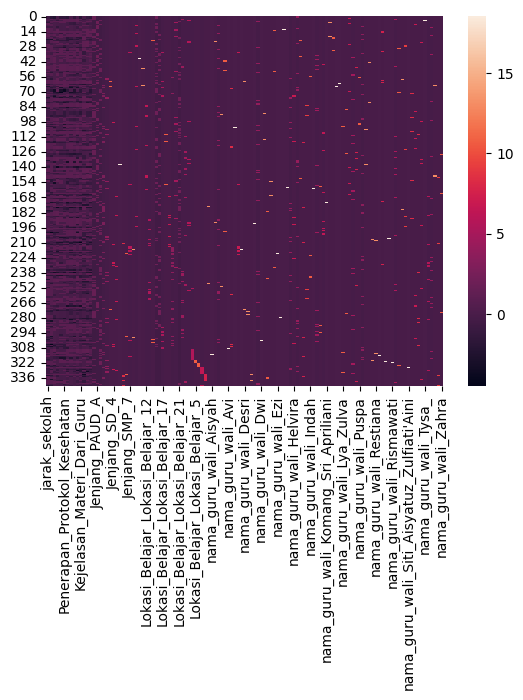

In [ ]:
sns.heatmap(survey_scaled)

In [ ]:
df = survey_scaled[['Kepuasan_Keseluruhan', 'nama_guru_wali_Martina_Dwi_Fitrianti', 'sering_akses_program_belajar', 'jarak_sekolah', 'Kemudahan_Mencari_Lokasi', 'Kelengkapan_Bahan_Ajar', 'Kecakapan_Tim_Admin_Merespon', 'Kemampuan_Interaksi_Guru', 'Penerapan_Protokol_Kesehatan', 'Kemudahan_Informasi_Tentang_Pembelajaran_Anak', 'Kondisi_Lingkungan_Belajar', 'Kebersihan_Ruangan', 'Komunikasi_Orang_Tua_Dan_Tim_Sekolah', 'Komunikasi_Dengan_Guru_Kelas', 'Kejelasan_Materi_Dari_Guru']]
df.head()

,Kepuasan_Keseluruhan,nama_guru_wali_Martina_Dwi_Fitrianti,sering_akses_program_belajar,jarak_sekolah,Kemudahan_Mencari_Lokasi,Kelengkapan_Bahan_Ajar,Kecakapan_Tim_Admin_Merespon,Kemampuan_Interaksi_Guru,Penerapan_Protokol_Kesehatan,Kemudahan_Informasi_Tentang_Pembelajaran_Anak,Kondisi_Lingkungan_Belajar,Kebersihan_Ruangan,Komunikasi_Orang_Tua_Dan_Tim_Sekolah,Komunikasi_Dengan_Guru_Kelas,Kejelasan_Materi_Dari_Guru
0,-1.575960,-0.144123,-0.083470,-0.708971,-1.781029,-0.112633,0.134976,-1.832158,-1.441055,-1.203647,-2.233797,-1.578978,-0.049538,-1.393871,-1.767568
1,-1.575960,6.938505,-0.083470,-0.708971,-1.781029,-0.112633,0.134976,-1.832158,-1.441055,-1.203647,-2.233797,-1.578978,-0.049538,-1.393871,-1.767568
2,0.739672,-0.144123,-1.279878,0.174674,0.719681,-0.112633,1.166791,0.844115,1.025228,0.014161,-0.035153,1.083612,1.015524,0.911377,0.922889
3,0.331031,-0.144123,-0.083470,0.174674,-0.530674,-1.362502,1.166791,0.844115,1.025228,0.014161,-0.035153,-0.247683,1.015524,0.911377,-0.422339
4,1.148313,-0.144123,-0.083470,-0.708971,0.719681,1.137235,1.166791,0.844115,1.025228,1.231968,1.064169,1.083612,1.015524,0.911377,0.922889


In [ ]:
corr = df.corr()

In [ ]:
corr

,Kepuasan_Keseluruhan,nama_guru_wali_Martina_Dwi_Fitrianti,sering_akses_program_belajar,jarak_sekolah,Kemudahan_Mencari_Lokasi,Kelengkapan_Bahan_Ajar,Kecakapan_Tim_Admin_Merespon,Kemampuan_Interaksi_Guru,Penerapan_Protokol_Kesehatan,Kemudahan_Informasi_Tentang_Pembelajaran_Anak,Kondisi_Lingkungan_Belajar,Kebersihan_Ruangan,Komunikasi_Orang_Tua_Dan_Tim_Sekolah,Komunikasi_Dengan_Guru_Kelas,Kejelasan_Materi_Dari_Guru
Kepuasan_Keseluruhan,1.000000,-0.173847,0.289610,0.544699,0.549967,0.673245,0.682569,0.696047,0.700669,0.700793,0.706808,0.733024,0.775938,0.778616,0.782207
nama_guru_wali_Martina_Dwi_Fitrianti,-0.173847,1.000000,-0.061296,-0.047599,-0.127970,-0.067700,-0.065523,-0.153853,-0.131522,-0.148400,-0.231406,-0.117927,-0.072925,-0.153426,-0.143960
sering_akses_program_belajar,0.289610,-0.061296,1.000000,0.122144,0.181834,0.181864,0.100981,0.000649,0.089865,0.373902,0.062063,0.127491,0.092174,0.112152,0.062998
jarak_sekolah,0.544699,-0.047599,0.122144,1.000000,0.484538,0.353574,0.267974,0.199724,0.280223,0.232143,0.311118,0.337362,0.331484,0.276042,0.243093
Kemudahan_Mencari_Lokasi,0.549967,-0.127970,0.181834,0.484538,1.000000,0.276408,0.270399,0.263126,0.342364,0.273101,0.396905,0.342776,0.291153,0.303496,0.269723
Kelengkapan_Bahan_Ajar,0.673245,-0.067700,0.181864,0.353574,0.276408,1.000000,0.416339,0.396514,0.429104,0.457340,0.463363,0.523526,0.447179,0.408366,0.480299
Kecakapan_Tim_Admin_Merespon,0.682569,-0.065523,0.100981,0.267974,0.270399,0.416339,1.000000,0.435940,0.368349,0.436421,0.416917,0.428755,0.661582,0.499292,0.492781
Kemampuan_Interaksi_Guru,0.696047,-0.153853,0.000649,0.199724,0.263126,0.396514,0.435940,1.000000,0.501688,0.438080,0.423091,0.478362,0.522405,0.687872,0.790829
Penerapan_Protokol_Kesehatan,0.700669,-0.131522,0.089865,0.280223,0.342364,0.429104,0.368349,0.501688,1.000000,0.404569,0.552278,0.645261,0.466943,0.478716,0.563195
Kemudahan_Informasi_Tentang_Pembelajaran_Anak,0.700793,-0.148400,0.373902,0.232143,0.273101,0.457340,0.436421,0.438080,0.404569,1.000000,0.451941,0.432388,0.517255,0.521633,0.553645


<Axes: >

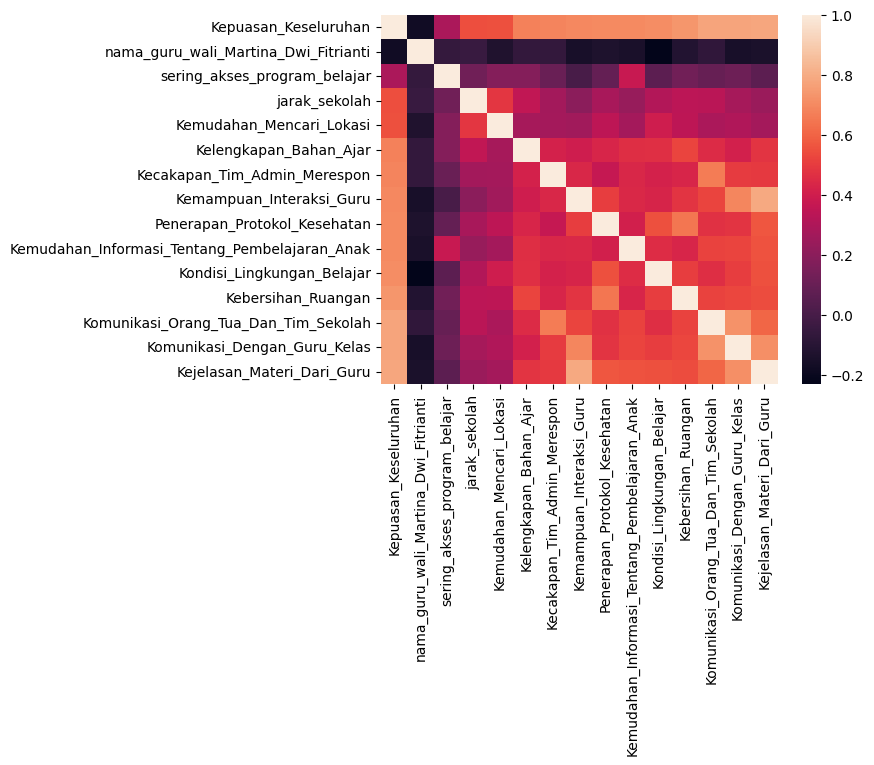

In [ ]:
sns.heatmap(corr)

<Axes: >

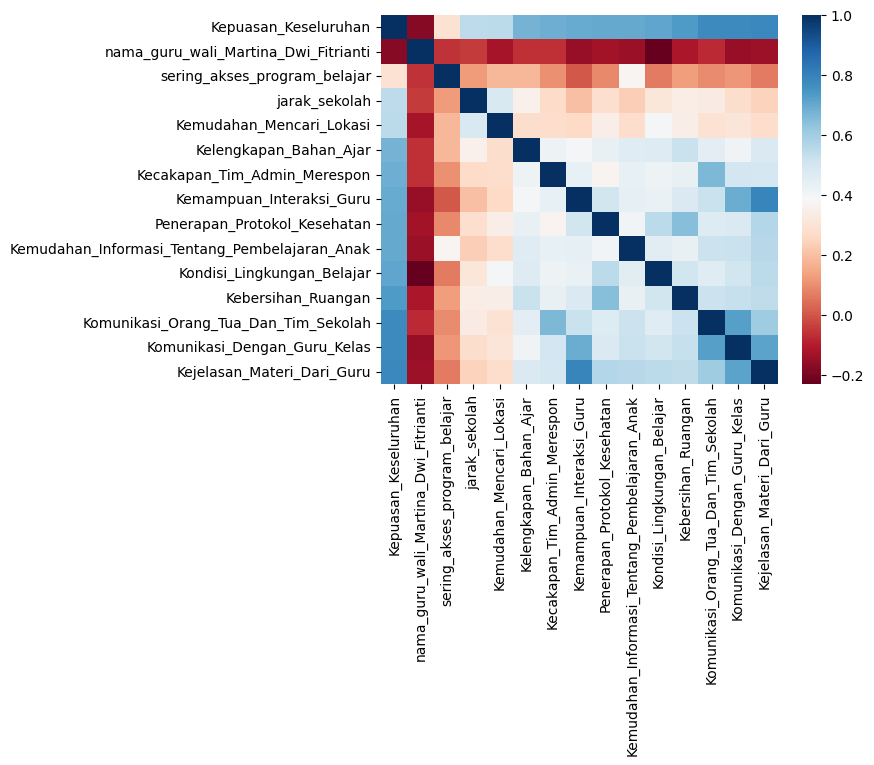

In [ ]:
sns.heatmap(corr, cmap='RdBu')

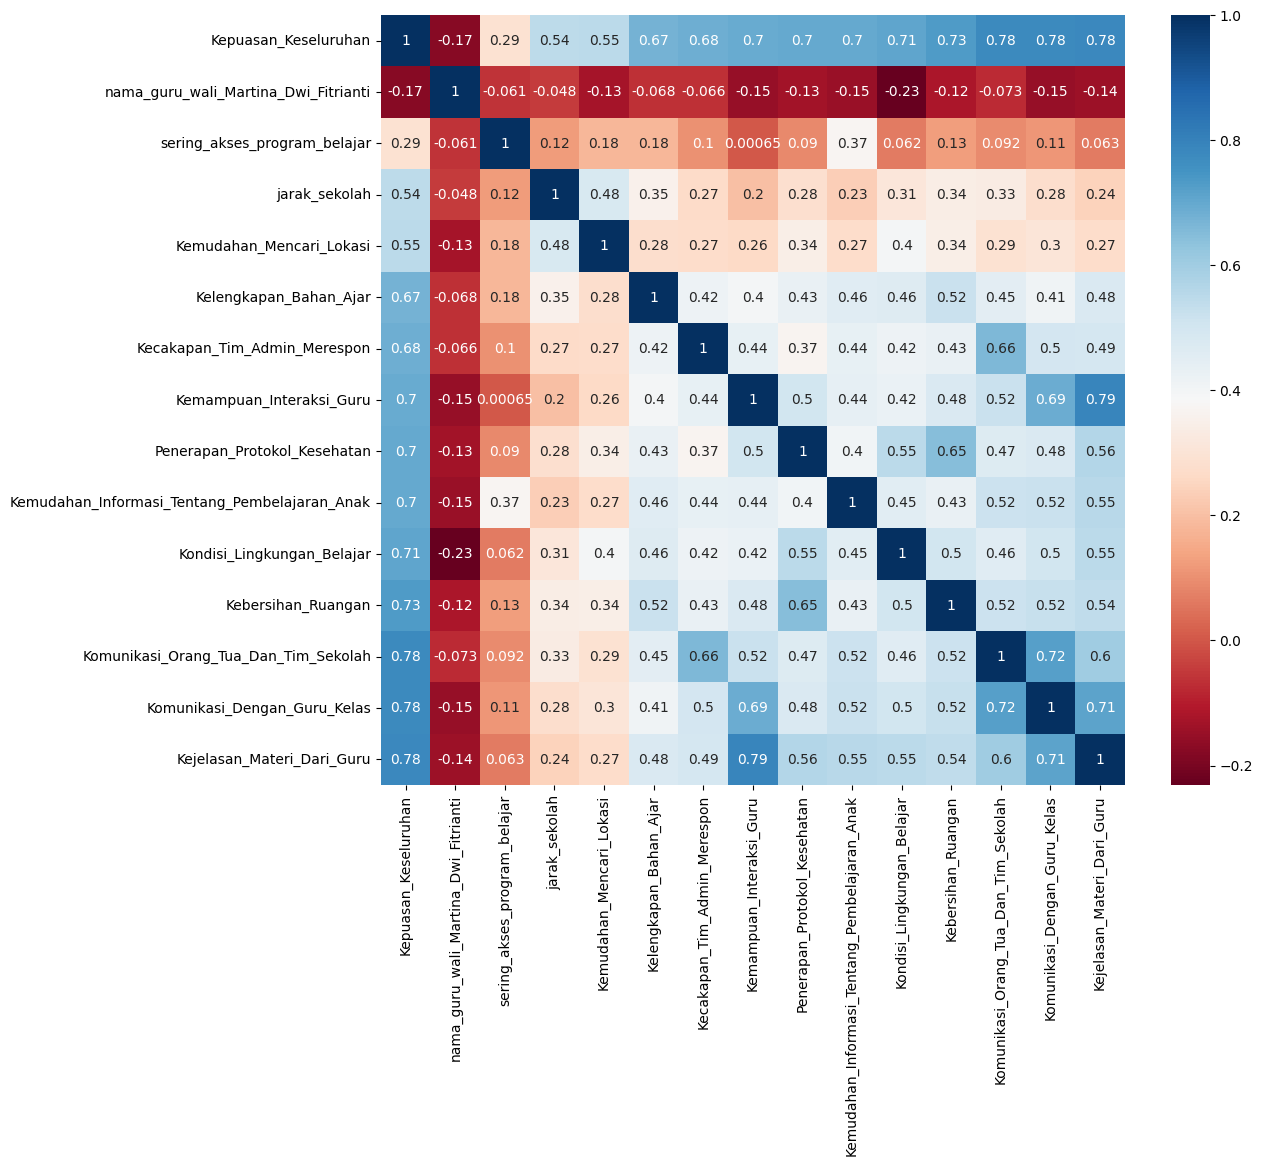

In [ ]:
# Membuat heatmap dengan penyesuaian ukuran gambar
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='RdBu', annot=True)

# Menampilkan plot
plt.show()

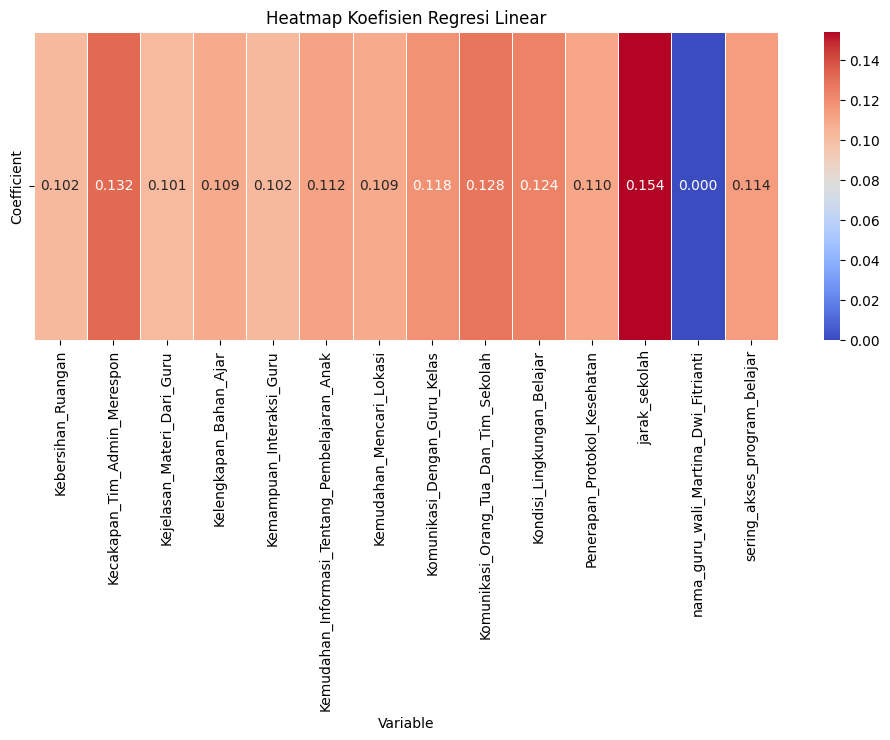

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Anggap df adalah DataFrame yang berisi data Anda
X = survey_scaled[['nama_guru_wali_Martina_Dwi_Fitrianti', 'sering_akses_program_belajar', 'jarak_sekolah', 'Kemudahan_Mencari_Lokasi', 'Kelengkapan_Bahan_Ajar', 'Kecakapan_Tim_Admin_Merespon', 'Kemampuan_Interaksi_Guru', 'Penerapan_Protokol_Kesehatan', 'Kemudahan_Informasi_Tentang_Pembelajaran_Anak', 'Kondisi_Lingkungan_Belajar', 'Kebersihan_Ruangan', 'Komunikasi_Orang_Tua_Dan_Tim_Sekolah', 'Komunikasi_Dengan_Guru_Kelas', 'Kejelasan_Materi_Dari_Guru']]
y = survey_scaled['Kepuasan_Keseluruhan']

# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

coef = model.coef_

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat DataFrame dari koefisien regresi
data = {'Variable': X.columns, 'Coefficient': coef}
coef_df = pd.DataFrame(data)

# Membuat heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(coef_df.pivot_table(index='Variable', values='Coefficient').T, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Heatmap Koefisien Regresi Linear')
plt.show()


In [ ]:
coef

array([2.70609788e-16, 1.13852173e-01, 1.54149790e-01, 1.08939930e-01,
       1.08982379e-01, 1.32013634e-01, 1.01793517e-01, 1.10460680e-01,
       1.11851491e-01, 1.23906927e-01, 1.02316643e-01, 1.27892739e-01,
       1.18176930e-01, 1.01256850e-01])